# Setup

In [2]:
import numpy as np
import sklearn
import pandas as pd
import os
import zipfile

In [3]:
os.path.abspath('.')

'C:\\Users\\Mike\\DataScienceProjects\\datahack2020\\datahack2020\\analyses\\team04\\mg'

In [4]:
# Set up some directory info, and figure export path
PROJECT_ROOT_DIR = '../../../'
NOTEBOOK_ID = 'EDA_mg'
FIGURE_EXPORT_PATH = os.path.join(PROJECT_ROOT_DIR, "analyses/team04/mg/figures", NOTEBOOK_ID)
os.makedirs(FIGURE_EXPORT_PATH, exist_ok = True)

In [5]:
# Define figure export
def save_fig(fig_id, tight_layout=True, fig_extension = "png", resolution = 300):
    path = os.path.join(FIGURE_EXPORT_PATH, fig_id + '.' + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

In [6]:
# Set up some plotting conveniences/settings
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# Investigate Files
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data/data.zip")
data = zipfile.ZipFile(DATA_PATH)    
# List all data files:
data.namelist()

['data/',
 'data/hf_samsha_providers.csv',
 'data/pp_refill_events.csv',
 'data/pp_sep_site_exchanges.csv',
 'data/dph_od_resident_counts.csv',
 'data/.DS_Store',
 'data/hf_physician_locator.csv',
 'data/dph_dash_ems_naloxone_zip.csv',
 'data/pp_refill_zipcode_metrics.csv',
 'data/dph_dash_n_ed_transfers.csv',
 'data/dph_dash_ems_naloxone_sex.csv',
 'data/pp_sep_site_participants.csv',
 'data/dph_dash_n_naloxone_admins.csv',
 'data/dph_od_incident_counts.csv',
 'data/dph_dash_ems_naloxone_age.csv',
 'data/hf_samsha_programs.csv']

In [8]:
# load data

# Needle Data
pp_sep_site_exchanges = pd.read_csv(data.open(r'data/pp_sep_site_exchanges.csv', pwd = b'*$1Y5.2,|sG$'))
pp_sep_site_participants = pd.read_csv(data.open(r'data/pp_sep_site_participants.csv', pwd = b'*$1Y5.2,|sG$'))

# Other Data
hf_samsha_providers = pd.read_csv(data.open(r'data/hf_samsha_providers.csv', pwd = b"*$1Y5.2,|sG$"))
pp_refill_events = pd.read_csv(data.open(r'data/pp_refill_events.csv', pwd = b'*$1Y5.2,|sG$'))
dph_od_resident_counts = pd.read_csv(data.open(r'data/dph_od_resident_counts.csv', pwd = b'*$1Y5.2,|sG$'))
pp_refill_zipcode_metrics = pd.read_csv(data.open(r'data/pp_refill_zipcode_metrics.csv', pwd = b'*$1Y5.2,|sG$'))
hf_physician_locator = pd.read_csv(data.open(r'data/hf_physician_locator.csv', pwd = b'*$1Y5.2,|sG$'))

In [9]:
pp_refill_zipcode_metrics.head(5)

,participant_zip,avg_outcome_ems,avg_outcome_police,avg_outcome_ed,avg_outcome_death,avg_outcome_unk,avg_outcome_ok,avg_od_drug_heroin,avg_od_drug_cocaine,avg_od_drug_fentanyl,avg_od_drug_unknown,avg_od_drug_other,avg_od_present_breath,avg_od_present_unresponsive,avg_od_present_coloring,avg_od_present_other,avg_cpr_used,n_observations
0,19111.0,0.366667,0.150000,0.200000,0.000000,0.150000,0.700000,0.517241,0.068966,0.310345,0.241379,0.161290,0.642857,0.750000,0.678571,0.000000,0.600000,31
1,19120.0,0.318182,0.210526,0.052632,0.000000,0.052632,0.526316,0.695652,0.130435,0.652174,0.000000,0.000000,0.304348,0.565217,0.478261,0.043478,0.428571,26
2,19122.0,0.187500,0.115385,0.000000,0.000000,0.076923,0.769231,0.366667,0.033333,0.366667,0.266667,0.093750,0.387097,0.419355,0.322581,0.225806,0.333333,36
3,19124.0,0.358209,0.176471,0.125000,0.026144,0.071895,0.581699,0.820513,0.200000,0.528205,0.061538,0.088235,0.438144,0.541237,0.556701,0.030928,0.453333,219
4,19125.0,0.206186,0.115942,0.072464,0.043478,0.202899,0.608696,0.648352,0.109890,0.494505,0.098901,0.140000,0.377778,0.511111,0.555556,0.011236,0.419355,102


In [10]:
pp_sep_site_exchanges.head(5)

,site_id,visit_month,syringes_returned,syringes_dispensed,no_exchanging_for
0,1.0,2019-01-01,5625,6175,48
1,1.0,2019-02-01,12700,13960,89
2,1.0,2019-03-01,8862,10470,76
3,1.0,2019-04-01,6130,7070,64
4,1.0,2019-05-01,9369,9830,66


In [11]:
pp_sep_site_exchanges["site_id"].value_counts()

7.0     12
4.0     12
5.0     12
10.0    12
6.0     12
8.0     12
1.0     11
2.0     11
3.0     11
11.0    11
99.0    10
9.0     10
22.0     1
12.0     1
13.0     1
17.0     1
18.0     1
Name: site_id, dtype: int64

In [12]:
pp_sep_site_participants.head(5)

,site_id,visit_month,count_distinct_participants
0,1,2019-01-01,42
1,1,2019-10-01,51
2,1,2019-11-01,73
3,1,2019-12-01,54
4,1,2019-02-01,74


In [13]:
pp_sep_site_participants["site_id"].value_counts()

5     14
8     13
7     12
4     12
10    12
6     12
1     11
2     11
3     11
11    11
99    10
9     10
22     1
12     1
13     1
17     1
18     1
Name: site_id, dtype: int64

In [14]:
#Random fact:

#According to https://www.phila.gov/media/20181002083054/Injecting_Drug_Users_Philadelphia_2015.pdf
# Approximately 55% of IDUs receive needles from needle exchanges.

## Some quick plots

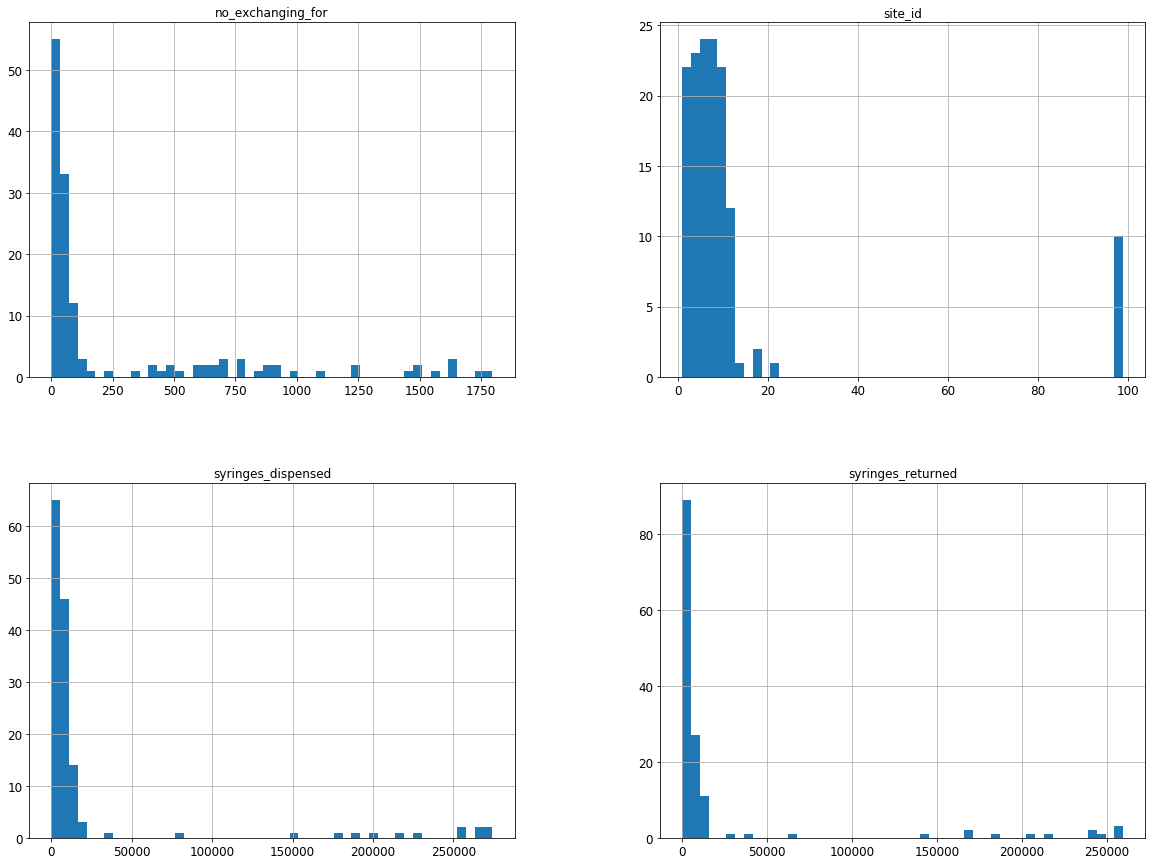

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

pp_sep_site_exchanges.hist(bins = 50, figsize = (20,15))
plt.show()

Some of this data seems odd.

Questions:

1.  What does number exchanging for actually measure? Varies from 0 to ~1700, so hard to imagine it is not aggregated or that it is aggregated considering both extremes!
2.  Why are site_id labels discontinuous? Is this an error in data collection?
3.  Same as Q1 but for syringes returned and dispensed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C2B411B88>,
      dtype=object)

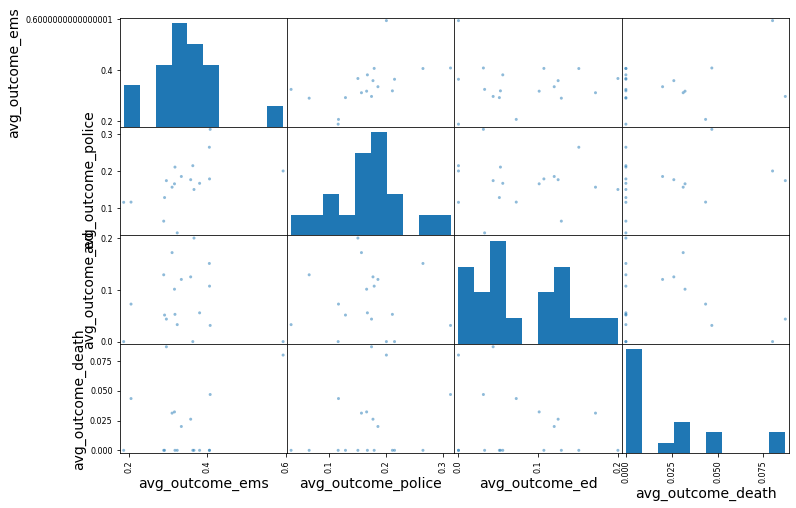

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["avg_outcome_ems", "avg_outcome_police", "avg_outcome_ed", "avg_outcome_death"]
scatter_matrix(pp_refill_zipcode_metrics[attributes], figsize = (12,8))

Saving figure police_vs_ems_outcomes


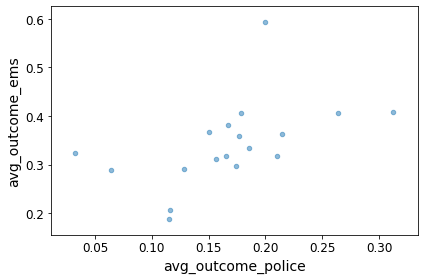

In [18]:
pp_refill_zipcode_metrics.plot(kind = 'scatter', x ="avg_outcome_police", y = "avg_outcome_ems", alpha = .5)
save_fig("police_vs_ems_outcomes")

 ## Add lat/lon data to site location file

In [17]:
# Zip code info:
zip_path = os.path.join(PROJECT_ROOT_DIR, "codebooks/sep_site_outrigger.csv")
lat_lon_path = os.path.join(PROJECT_ROOT_DIR, "analyses/team04/mg/data/sep_site_outrigger_LATLON.csv")
zip_codes = pd.read_csv(zip_path)
lat_lon = pd.read_csv(lat_lon_path)

In [2]:
lat_lon.head(15)

NameError: name 'lat_lon' is not defined

In [19]:
# Fill in missing lat/lons. Should really automate, but for now:

# Upon google search: Headquarters is at 39.992885, -75.119643

# Since this is most frequent missing value, let's just start by replacing all NANs with it:
lat_lon[["Lat"]]=lat_lon[["Lat"]].fillna(value = 39.992885)
lat_lon[["Lon"]]=lat_lon[["Lon"]].fillna(value = -75.119643)


# Can't find "Ben Franklin" as a current mobile location on PP website. Maybe ask about?
# Choose random point on ben franklin parkway (small enough to choose randomly): 39.960957, -75.174247

lat_lon.loc[lat_lon["site_location"] == "Ben Franklin", ["Lat"]] = 39.960957
lat_lon.loc[lat_lon["site_location"] == "Ben Franklin", ["Lon"]] = -75.174247


# Can't find location info for Project SAFE or SOL collective

In [21]:
lat_lon_new_path = os.path.join(PROJECT_ROOT_DIR, "analyses/team04/mg/data/sep_site_outrigger_LATLON_updated.csv")

In [49]:
# Save updated lat_lon file
lat_lon.to_csv(lat_lon_new_path, index = False) 